# 4 Dataset Classification

In [1]:
#Importing the libraries to watch the 'fits' image and get the data array
import astropy
#import plotly.graph_objects as go
from astropy.io import fits
#Importing a library that is useful to read the original file
import pandas as pd
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
#Importing a visual library with some illustrative set up
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
from matplotlib import cm
import numpy as np
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.decomposition import PCA
import math 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
#plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (16, 8) 
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
plt.rcParams["axes.grid"] = False



/Users/pierohmd/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#Importing the dataset
data=pd.read_csv('star.txt',sep='\s+')

In [3]:
data.head()

,#ID,X,Y,F606W,error,F814W,error.1,Chi,Sharp
0,8,4462.947,140.859,28.197,0.1036,27.127,0.1068,6.106,0.7310
1,120,5002.486,186.138,20.843,0.0552,19.815,0.0661,10.690,0.4000
2,165,5003.574,195.421,27.014,0.2194,26.068,0.1349,10.651,0.1940
3,226,4448.493,207.417,30.193,0.3641,28.270,0.1636,4.059,-1.9585
4,351,5040.717,224.366,28.935,0.1669,28.941,0.2464,4.274,-0.7720


In [4]:
#Excluding Sharp and #ID
notar=data.drop(columns=['Sharp','#ID'])

# P.C.A. Excluding Space

In [5]:
#Excluding Space Features in order to perform the P.C.A.
notar=data.drop(columns=['X','Y'])

In [6]:
notar.head()

,#ID,F606W,error,F814W,error.1,Chi,Sharp
0,8,28.197,0.1036,27.127,0.1068,6.106,0.7310
1,120,20.843,0.0552,19.815,0.0661,10.690,0.4000
2,165,27.014,0.2194,26.068,0.1349,10.651,0.1940
3,226,30.193,0.3641,28.270,0.1636,4.059,-1.9585
4,351,28.935,0.1669,28.941,0.2464,4.274,-0.7720


In [7]:
pca=PCA(n_components=3)
pca=pca.fit(notar)
pca_data=pd.DataFrame(pca.transform(notar))

In [8]:
pca_data=pca_data.rename(columns={0:'FirstComponent',1:'SecondComponent',2:'ThirdComponent'})

In [9]:
#Stacking together the spatial coordinates
pca_data['X']=data.X
pca_data['Y']=data.Y

In [10]:
#And the sharp
pca_data['Sharp']=data.Sharp

In [11]:
pca_data.head()

,FirstComponent,SecondComponent,ThirdComponent,X,Y,Sharp
0,-705040.285186,-1.458598,3.388920,4462.947,140.859,0.7310
1,-704928.285165,9.153223,7.337162,5002.486,186.138,0.4000
2,-704883.285185,0.379070,7.828835,5003.574,195.421,0.1940
3,-704822.285190,-3.859786,1.456460,4448.493,207.417,-1.9585
4,-704697.285189,-3.431945,1.674933,5040.717,224.366,-0.7720


In [13]:
#pca_data=pca_data.drop(columns=['Sharp'])

# Best method 3 Features

In [12]:
#Two classification pre process, the Sharp is considered by its sign
data['SharpSign']=np.sign(data.Sharp)

In [13]:
#The 0 values are considered as positive 
data[data['SharpSign']==0]['SharpSign']=np.ones(len(data[data['SharpSign']==0]))

<ipython-input-13-6f0636eb8ad6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data['SharpSign']==0]['SharpSign']=np.ones(len(data[data['SharpSign']==0]))


In [14]:
#Three features are considered, the most informative 
opt_data=pca_data[['FirstComponent','SecondComponent','ThirdComponent']]
opt_data['Target']=data.SharpSign

<ipython-input-14-ed6569bb3e8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opt_data['Target']=data.SharpSign


In [15]:
#Target 
y=opt_data.Target

In [16]:
#dataset
X=opt_data.drop(columns=['Target'])


In [17]:
#Importing SVM and train test split from sklearn model selection
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [18]:
#(Train+validation)/Test split with wide test set (90%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.9, random_state=42)

In [19]:
#Train/Validation split at half
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.5, random_state=42)

In [20]:
#List of kernels
K_LIST=['linear', 'poly', 'rbf', 'sigmoid']

In [ ]:
#Validation with CV_number=5 has been performed to choose the best kernel
BEST_KERNEL=[]
k=0
for i in range(5):
    FIN_SCORE=[]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.9, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.5, random_state=42)
    print('Split Done')
    for ker in K_LIST:
        clf=SVC(kernel=ker)
        clf.fit(X_train,y_train)
        fin_score=clf.score(X_val,y_val)
        FIN_SCORE.append(fin_score)
        k=k+1
        print(ker + ' Kernel has been explored')
    FIN_SCORE=np.array(FIN_SCORE)
    
    BEST_KERNEL.append(K_LIST[FIN_SCORE.argmax()])
    print('Cross validation ' + str(i) + ' out of 4 \n')

Split Done


Text(0.5, 0, 'Chosen Kernel')

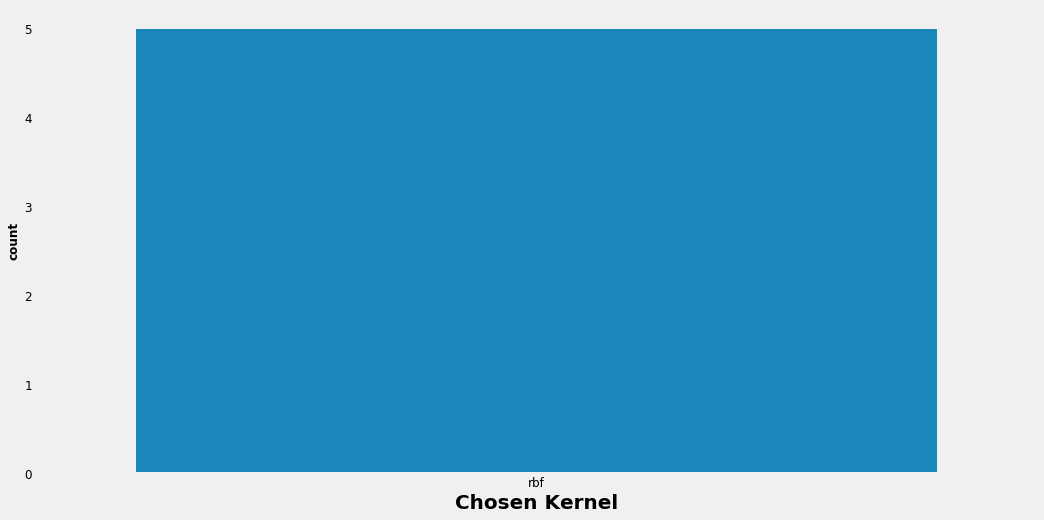

In [25]:
sns.countplot(np.array(BEST_KERNEL))
plt.xlabel('Chosen Kernel',fontsize=20)

In [39]:
#Best kernel is chosen 5 times out of 5
best_kernel='rbf'

In [97]:
#Cross validation on C values 
c_list=np.arange(0.5,50.5,0.5)
k=0
PERC=['20%','40%','60%','80%','100%']
K=[20,40,60,80,100]
BEST_C=[]
for i in range(5):
    FIN_SCORE=[]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.9, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.5, random_state=42)
    for c in c_list:
        k=k+1
        clf=SVC(C=c,kernel=best_kernel)
        clf.fit(X_train,y_train)
        fin_score=clf.score(X_val,y_val)
        FIN_SCORE.append(fin_score)
        #k=k+1
        if k in K:
            ind=K.index(k)
            print (PERC[ind] + ' of the C values has been explored')
    FIN_SCORE=np.array(FIN_SCORE)
    BEST_C.append(c_list[FIN_SCORE.argmax()])
    print('Cross validation ' + str(i) + ' out of 4 \n')

20% of the C values has been explored
40% of the C values has been explored
60% of the C values has been explored
80% of the C values has been explored
100% of the C values has been explored
Cross validation 0 out of 4 

Cross validation 1 out of 4 

Cross validation 2 out of 4 

Cross validation 3 out of 4 

Cross validation 4 out of 4 



Text(0, 0.5, 'Count')

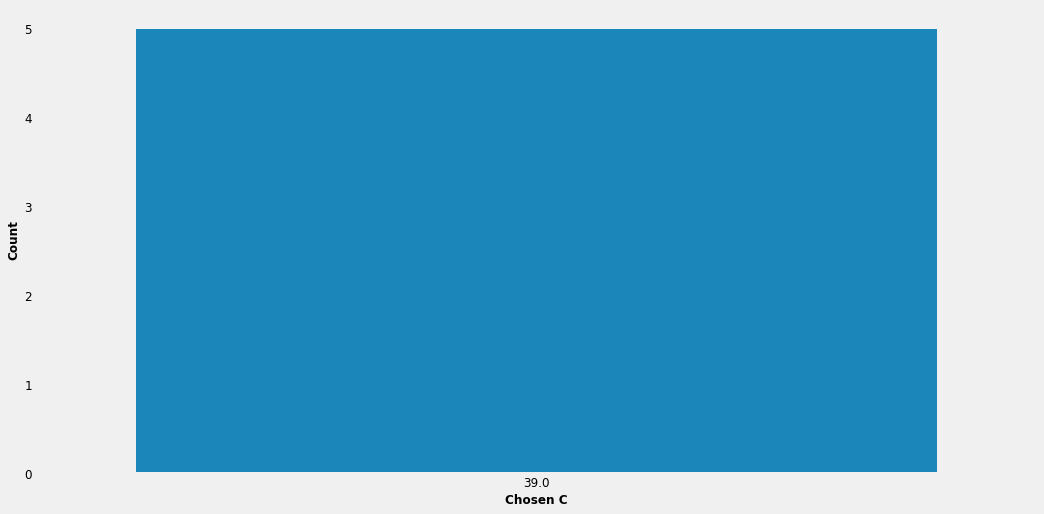

In [100]:
sns.countplot(BEST_C)
plt.xlabel('Chosen C')
plt.ylabel('Count')

In [101]:
FIN_SCORE=np.array(FIN_SCORE)

In [102]:
#39 is chosen 5 times out of 5
best_c=c_list[FIN_SCORE.argmax()]

In [107]:
#Train test split 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=42)

In [108]:
#Prediction with best parameters
clf=SVC(kernel=best_kernel,C=best_c)
clf.fit(X_train,y_train)
fin_score=clf.score(X_test,y_test)

In [119]:
prediction=clf.predict(X_test.drop(columns=['Target']))

In [113]:
print('The final score with 3 feature is ' + str(fin_score*100) +'% ')

The final score with 3 feature is 71.66999666999668% 


In [121]:
#Comparing prediction and target 
test_data=X_test.copy()
test_data['Target']=y_test
test_data['Prediction']=prediction

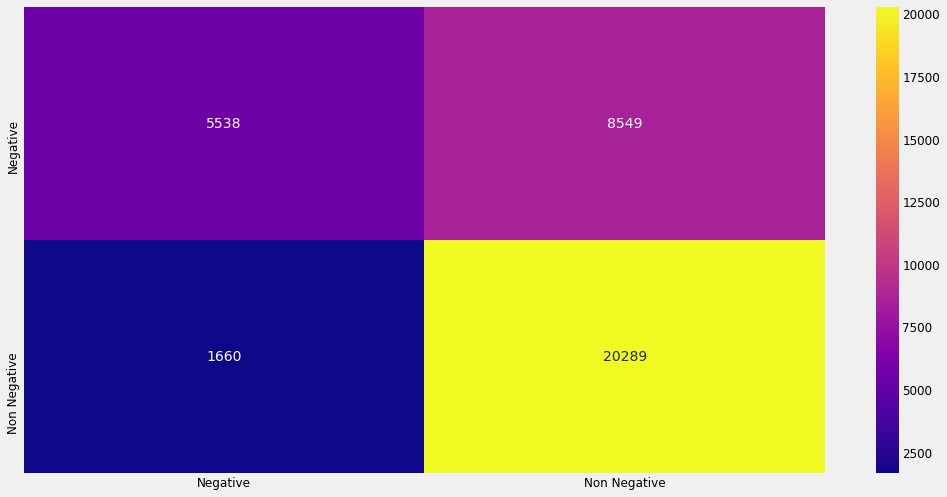

In [169]:
#Confusion matrix
import itertools
from string import ascii_uppercase
from sklearn.metrics import confusion_matrix

y_test=test_data.Target
predic = prediction

columns = ['Negative','Non Negative']

confm = confusion_matrix(y_test, predic)
df_cm = pd.DataFrame(confm.astype(float), index=columns, columns=columns)

ax = sns.heatmap(df_cm, cmap='plasma',annot=True,fmt='g')

In [170]:
#Defining precision and recall out of the confusion matrix
def precision(confusion):
    TP=confusion[0][0]
    TN=confusion[1][1]
    FP=confusion[0][1]
    FN=confusion[1][0]
    pres_a=TP/(TP+FN)
    pres_b=TN/(TN+FP)
    return [pres_a,pres_b]

In [172]:
def recall(confusion):
    TP=confusion[0][0]
    TN=confusion[1][1]
    FP=confusion[0][1]
    FN=confusion[1][0]
    rec_a=TP/(TP+FP)
    rec_b=TN/(TN+FN)
    return [rec_a,rec_b]

In [176]:
#Display the statistics
def statistics(confusion):
    stat=pd.DataFrame({'Negative':[precision(confusion)[0],recall(confusion)[0]],'Non Negative':[precision(confusion)[1],recall(confusion)[1]]})
    stat.index=['Precision','Recall']
    return stat

In [177]:
statistics(confm)

,Negative,Non Negative
Precision,0.769380,0.703551
Recall,0.393128,0.924370
